# Local Data Tests

### Import Modules

In [1]:
import numpy as np
import xarray as xr
import timeit
import matplotlib.pyplot as plt
from dask.distributed import Client

## Setup for Global Tests

### Open MUR Global Dataset

In [ ]:
start_time = timeit.default_timer()

mur_global = xr.open_mfdataset(
    '../data/podaac_web_global/*.nc4', 
    engine='netcdf4',
    chunks={"time": 30, "lat": 100, "lon": 100}
)

elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
mur_global

### Add in NAN Values for Land to MUR Data
<br/>
We use the mask dimension to replace temperature values from land observations with NaN so that they are not factored in to our calculations. The mask variable has a value for each coordinate pair representing which surface the temperature was collected from (land, open-sea, ice, etc.).

In [ ]:
mur_global_sst = mur_global['analysed_sst'].where(mur.mask == 1)

### Convert Temperatures to Celsius
<br/>
The dataset is stored with temperatures measured in Kelvin. This converts it to Celsius for ease of understanding and analysis.

In [ ]:
mur_global_sst = mur_global_sst - 273.15

In [ ]:
mur_global_sst

### Find Daily Average Temperature for Time Series

In [ ]:
mur_global_sst_mean_ts = mur_global_sst.mean(['lat', 'lon'])

### Find Average Temperature for Each Coordinate Pair for Spatial Plot

In [ ]:
mur_global_sst_mean_sp = mur_global_sst.mean(['time'])

## Global Tests

### Global SST Averaged Time Series

In [ ]:
start_time = timeit.default_timer()

mur_global_sst_mean_ts.plot()

elapsed = timeit.default_timer() - start_time
print(elapsed)

### Global SST Averaged Spatial Plot

In [ ]:
start_time = timeit.default_timer()

mur_global_sst_mean_sp.plot()

elapsed = timeit.default_timer() - start_time
print(elapsed)

## Setup for Regional Tests

In [2]:
start_time = timeit.default_timer()


variables=[
    'analysed_sst', 
    'mask'
]

def subset(ds):
    subset_ds = ds[variables]
    return subset_ds

mur_hawaii = xr.open_mfdataset(
    '../data/MURHawaiiOPeNDAP/*.nc', 
    preprocess=subset,
    engine='netcdf4',
    combine='by_coords',
    chunks={"time": 30, "lat": 100, "lon": 100}
)


elapsed = timeit.default_timer() - start_time
print(elapsed)

2.5806658700003027


In [3]:
mur_hawaii

,Array,Chunk
Bytes,199.44 MiB,39.06 kiB
Shape,"(173, 502, 602)","(1, 100, 100)"
Count,14705 Tasks,7266 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,199.44 MiB,39.06 kiB
Shape,"(173, 502, 602)","(1, 100, 100)"
Count,14705 Tasks,7266 Chunks
Type,float32,numpy.ndarray


### Add in NAN Values for Land to MUR Data
<br/>
We use the mask dimension to replace temperature values from land observations with NaN so that they are not factored in to our calculations. The mask variable has a value for each coordinate pair representing which surface the temperature was collected from (land, open-sea, ice, etc.).

In [4]:
mur_hawaii_sst = mur_hawaii['analysed_sst'].where(mur_hawaii.mask == 1)

### Convert Temperatures to Celsius
<br/>
The dataset is stored with temperatures measured in Kelvin. This converts it to Celsius for ease of understanding and analysis.

In [5]:
mur_hawaii_sst = mur_hawaii_sst - 273.15

In [6]:
mur_hawaii_sst

,Array,Chunk
Bytes,199.44 MiB,39.06 kiB
Shape,"(173, 502, 602)","(1, 100, 100)"
Count,51208 Tasks,7266 Chunks
Type,float32,numpy.ndarray


### Open MUR Climatology for Hawaii

In [7]:
mur_clim = xr.open_dataarray(
    "../data/MURClimatology.nc", 
    chunks={"time": 30, "lat": 100, "lon": 100}
)

In [8]:
mur_clim

,Array,Chunk
Bytes,420.39 MiB,1.14 MiB
Shape,"(366, 501, 601)","(30, 100, 100)"
Count,547 Tasks,546 Chunks
Type,float32,numpy.ndarray


### Drop the Leap Day

In [9]:
mur_clim = mur_clim.where(mur_clim["time"] != np.datetime64('2004-02-29T09:00:00', 'ns'), drop=True)

### Create Subset

In [10]:
mur_clim_jan = mur_clim[0:20]

In [11]:
mur_clim_subset = mur_clim[212:]

In [12]:
mur_clim_subset = xr.concat([mur_clim_subset, mur_clim_jan], dim="time")

In [13]:
mur_clim_subset = mur_clim_subset.assign_coords({"time": mur_hawaii_sst["time"]})

In [14]:
mur_clim_subset

<xarray.DataArray 'sstclim' (time: 173, lat: 501, lon: 601)>
dask.array<concatenate, shape=(173, 501, 601), dtype=float32, chunksize=(30, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -160.0 -160.0 -160.0 -160.0 ... -154.0 -154.0 -154.0
  * lat      (lat) float32 18.0 18.01 18.02 18.03 ... 22.97 22.98 22.99 23.0
  * time     (time) datetime64[ns] 2019-08-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    description:  Hawaii Climatology from 2002-2015.
    start_date:   01/01
    end_date:     12/31
    units:        degC

### Create SST Anomaly Dataset

In [15]:
sst_anomaly = mur_hawaii_sst - mur_clim_subset

In [16]:
sst_anomaly

,Array,Chunk
Bytes,198.71 MiB,38.67 kiB
Shape,"(173, 501, 601)","(1, 99, 100)"
Count,133388 Tasks,13321 Chunks
Type,float32,numpy.ndarray


### Find Daily Average Temperature for Time Series

In [17]:
sst_anomaly_mean_ts = sst_anomaly.mean(['lat', 'lon'])

In [18]:
sst_anomaly_mean_ts

<xarray.DataArray (time: 173)>
dask.array<mean_agg-aggregate, shape=(173,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-08-01T09:00:00 ... 2020-01-20T09:00:00

### Find Average Temperature for Each Coordinate Pair for Spatial Plot

In [19]:
sst_anomaly_mean_sp = sst_anomaly.mean(['time'])

In [20]:
sst_anomaly_mean_sp

<xarray.DataArray (lat: 501, lon: 601)>
dask.array<mean_agg-aggregate, shape=(501, 601), dtype=float32, chunksize=(99, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 18.0 18.01 18.02 18.03 ... 22.97 22.98 22.99 23.0
  * lon      (lon) float64 -160.0 -160.0 -160.0 -160.0 ... -154.0 -154.0 -154.0

## Regional Tests

### Regional SST Anomaly Averaged Time Series, August 2019 - January 2020

36.84950690799997


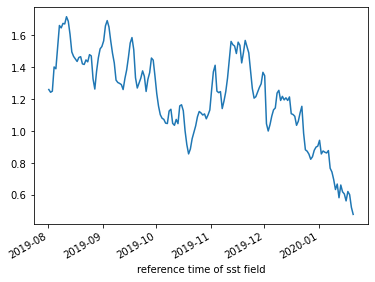

In [21]:
start_time = timeit.default_timer()

sst_anomaly_mean_ts.plot()

elapsed = timeit.default_timer() - start_time
print(elapsed)

### Regional SST Anomaly Averaged Spatial Plot, August 2019 - January 2020

/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


36.888554315000874


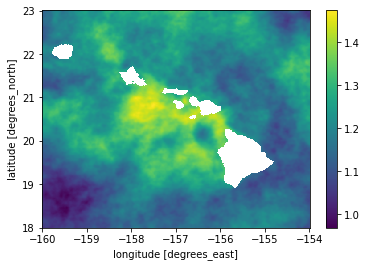

In [22]:
start_time = timeit.default_timer()

sst_anomaly_mean_sp.plot()

elapsed = timeit.default_timer() - start_time
print(elapsed)